In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"F:\datasets\bmi\bmi.csv")

In [3]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [4]:
data.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [5]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [6]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
#labelencoder replaces labels with values between 0 & -1

In [7]:
#making gender categorical
gender=LabelEncoder()
data['Gender']=gender.fit_transform(data['Gender'])
#fit_transform is used to fit the labelencoder and return the encoded labels
#female-0,male-1

In [8]:
data

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3
...,...,...,...,...
495,0,150,153,5
496,0,184,121,4
497,0,141,136,5
498,1,150,95,5


In [9]:
#making continuous Index values categorical (binnning)
bins=(-1,0,1,2,3,4,5)
health=['Malnourished','Underweight','Fit','Slightly Overweight','Overweight','Extremely Overweight']
data['Index']=pd.cut(data['Index'],bins=bins,labels=health)

In [10]:
data['Index']

0                Overweight
1                       Fit
2                Overweight
3       Slightly Overweight
4       Slightly Overweight
               ...         
495    Extremely Overweight
496              Overweight
497    Extremely Overweight
498    Extremely Overweight
499    Extremely Overweight
Name: Index, Length: 500, dtype: category
Categories (6, object): [Malnourished < Underweight < Fit < Slightly Overweight < Overweight < Extremely Overweight]

In [11]:
data
#Index values are grouped (binned) into 6 bins, namely: Malnourished (-1 to 0), Uderweight (0 to 1), Fit (1 to 2), 
#Slightly Overweight (2 to 3), Overweight (3-4), Extremely Overweight(4-5)

,Gender,Height,Weight,Index
0,1,174,96,Overweight
1,1,189,87,Fit
2,0,185,110,Overweight
3,0,195,104,Slightly Overweight
4,1,149,61,Slightly Overweight
...,...,...,...,...
495,0,150,153,Extremely Overweight
496,0,184,121,Overweight
497,0,141,136,Extremely Overweight
498,1,150,95,Extremely Overweight


In [12]:
#count of total rows
data['Index'].count()

500

In [13]:
#counts of different bins
data['Index'].value_counts()

Extremely Overweight    198
Overweight              130
Fit                      69
Slightly Overweight      68
Underweight              22
Malnourished             13
Name: Index, dtype: int64

In [14]:
#Gender count: male-1,female-0
data['Gender'].value_counts()

0    255
1    245
Name: Gender, dtype: int64

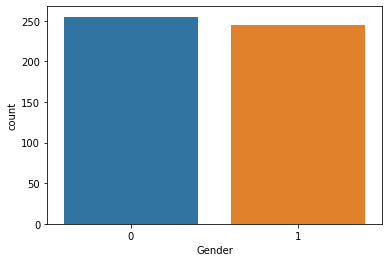

In [15]:
#male,female visualization
sns.countplot(data['Gender'])

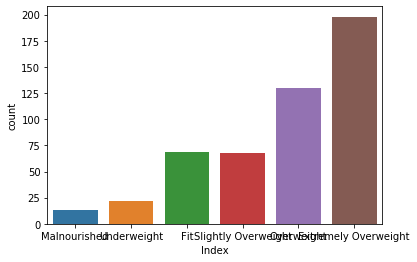

In [16]:
#Indices visualization
sns.countplot(data['Index'])

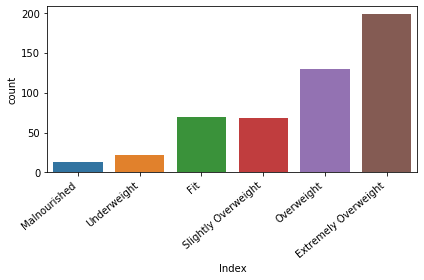

In [17]:
#x-axis overlapping problem solved
a = sns.countplot(x="Index", data=data)

a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

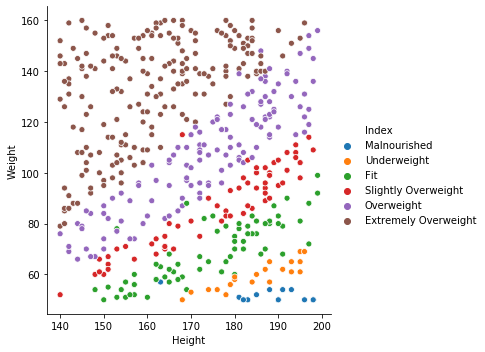

In [18]:
#plot depicting relationship between height & weight of people
sns.relplot(x='Height',y='Weight',hue='Index',data=data)

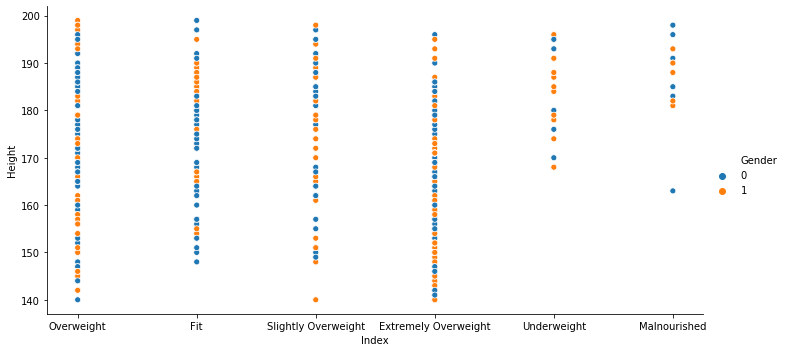

In [19]:
#plot depicting relationship between height & indices
sns.relplot(x='Index',y='Height',hue='Gender',data=data,height=5,aspect=2)

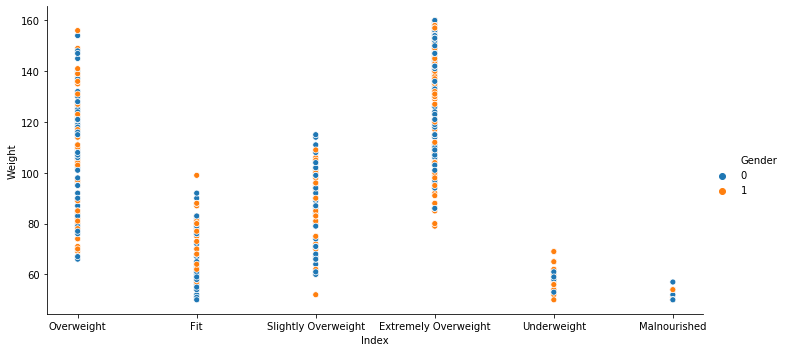

In [20]:
#plot depicting relationship between weight & indices
sns.relplot(x='Index',y='Weight',hue='Gender',data=data,height=5,aspect=2)

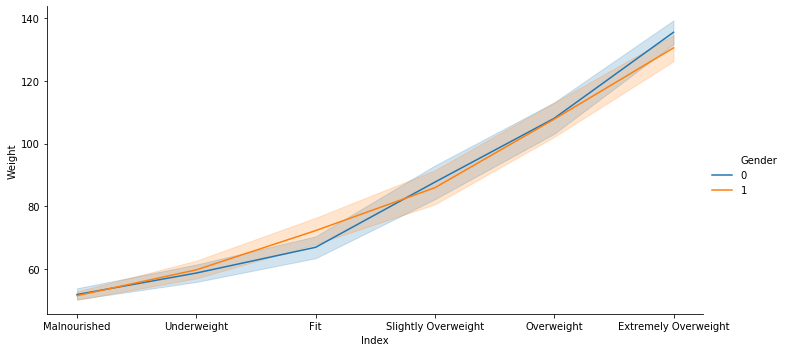

In [21]:
#plot depicting relationship between weight & indices (line)
sns.relplot(x='Index',y='Weight',hue='Gender', kind='line',data=data,height=5,aspect=2)

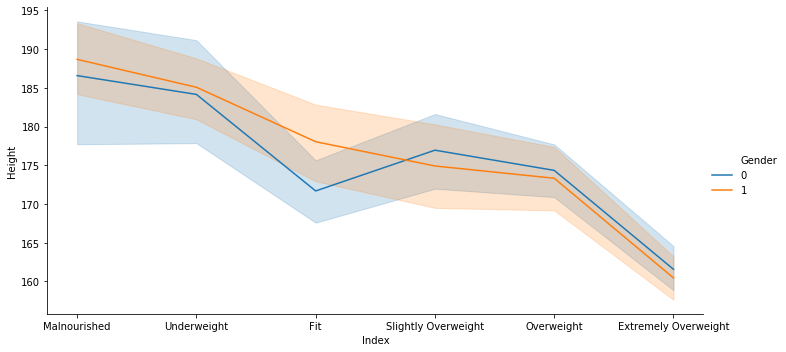

In [22]:
#plot depicting relationship between height & indices (line)
sns.relplot(x='Index',y='Height',hue='Gender', kind='line',data=data,height=5,aspect=2)

# Model to predict bmi

In [23]:
x=data.drop('Index',axis=1)
y=data['Index']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#random_state: if not used then every time the train & test data will be different hence, the name random_state. If used then
#every time the train and test data will be the same hence, debugging of the model will be easier. By default, it is random.

#test_size: size of the test dataset, here 20%

#x_test=testing dataset
#x_train=training dataset
#y_test=set of labels in x_test
#y_train=set of labels in x_train

In [25]:
s=StandardScaler()
x_train=s.fit_transform(x_train)
x_test=s.fit_transform(x_test)
#standardscaler: used for scaling down each feature so that the difference in values within a particluar feature(say ht.) is
#small and hence, the accuracy of the model increases. There are several scaling techniques. In this technique 
#(i.e, standardscaler), it takes the Mean and Standard Deviation of each feature and adjusted their scale in order to be in 
#between -1 and 1 with a Mean of 0. 

In [26]:
clf=svm.SVC()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)

In [27]:
print(classification_report(y_test,pred))
#classification_report: measures the quality of predictions of a model
#precision: ability of a classifier not to report a +ve sample as -ve
#recall: ability of a classifier to find all the positive samples
#f1-score: weighted harmonic mean of precision and recall
#support: no. of accurences of each class in the dataset
#macro average:simple average (mean)

                      precision    recall  f1-score   support

Extremely Overweight       0.86      1.00      0.92        36
                 Fit       0.62      0.80      0.70        10
        Malnourished       0.00      0.00      0.00         3
          Overweight       1.00      0.78      0.88        32
 Slightly Overweight       0.80      0.80      0.80        15
         Underweight       0.60      0.75      0.67         4

            accuracy                           0.84       100
           macro avg       0.65      0.69      0.66       100
        weighted avg       0.83      0.84      0.83       100



C:\Users\Souvik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
print(confusion_matrix(y_test,pred))
#diagonal is non-zero and others are zero= ACCURATE
#sum of diagonal elements/no. of elements=ACCURACY

[[36  0  0  0  0  0]
 [ 0  8  0  0  2  0]
 [ 0  1  0  0  0  2]
 [ 6  0  0 25  1  0]
 [ 0  3  0  0 12  0]
 [ 0  1  0  0  0  3]]


In [29]:
print(accuracy_score(y_test,pred))
#CONCLUSION: 85% ACCURACY

0.84


In [30]:
#testing the classifier for a new value (gender,height,weight; as in the data table)
a=[[1,160,80]]
a=s.transform(a)
b=clf.predict(a)

In [31]:
b #printing the prediction
#CONCLUSION: A male of height 160 and weight 80 is OVERWEIGHT

array(['Overweight'], dtype=object)

In [32]:
data

,Gender,Height,Weight,Index
0,1,174,96,Overweight
1,1,189,87,Fit
2,0,185,110,Overweight
3,0,195,104,Slightly Overweight
4,1,149,61,Slightly Overweight
...,...,...,...,...
495,0,150,153,Extremely Overweight
496,0,184,121,Overweight
497,0,141,136,Extremely Overweight
498,1,150,95,Extremely Overweight


In [33]:
#testing the prediction with an actual record present in the dataset
a=[[1,174,96]]
a=s.transform(a)
b=clf.predict(a)

In [34]:
b
#CONCLUSION: Successful!

array(['Overweight'], dtype=object)